# IMPORTING LIBRARIES

In [1]:
# importing libraries

# for data manipulation
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Display plots inline (Jupyter-specific)
%matplotlib inline


# machine learning algorithms for classifications
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier


#for splitting dataset into training and testing
from sklearn.model_selection import train_test_split

# for testing model performance
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

# for saving model
import pickle

# LOADING THE DATASET

In [2]:
# loading dataset
df_str = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Display the first 5 rows
df_str.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis (EDA)
BASIC DATA OVERVIEW


```
# This is formatted as code
```



In [3]:
# Display a concise summary of the DataFrame
df_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# # Generate descriptive statistics for numeric columns in the DataFrame
df_str.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Return the number of rows and columns in the DataFrame
df_str.shape

(5110, 12)

In [6]:
# Display the column names of the DataFrame
df_str.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# Check for zero values that may represent missing data
(df_str == 0).sum()

,0
id,0
gender,0
age,0
hypertension,4612
heart_disease,4834
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Data cleaning

In [8]:
# checking for missing value
df_str.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


## For bmi there is 201 missing data

In [9]:
# Count the number of duplicate rows in the DataFrame
df_str.duplicated().sum()

np.int64(0)

In [10]:
# Display the count of each unique BMI value in the dataset
df_str['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
27.7,37
26.7,37
26.1,37
...,...
46.8,1
58.1,1
50.4,1


In [11]:
# Fill missing BMI values by replacing them with the mean BMI grouped by 'gender' and 'work_type'
# This helps maintain subgroup distribution and avoids global imputation bias
bmi = df_str.groupby(['gender', 'work_type'])['bmi'].transform(lambda x: x.fillna(x.mean()))

# Display the count of each unique BMI value after imputation
bmi.value_counts()

,count
bmi,
30.322443,65
30.297713,49
28.700000,41
28.400000,38
27.700000,37
...,...
48.100000,1
51.700000,1
46.300000,1


In [12]:
# Updating the original 'bmi' column in the DataFrame with the imputed values
df_str['bmi'] = bmi

# Display the count of each unique BMI value after updating the column
df_str['bmi'].value_counts()

,count
bmi,
30.322443,65
30.297713,49
28.700000,41
28.400000,38
27.700000,37
...,...
48.100000,1
51.700000,1
46.300000,1


In [13]:
# Display the number of occurrences of each unique value in the 'gender' column
df_str['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [14]:
# Filter and display rows where the 'gender' column has the value 'Other'
# Useful for inspecting unusual or rare gender entries
df_str[df_str['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [15]:
# Drop rows from the DataFrame where the 'gender' value is 'Other'
df_str.drop(df_str[df_str['gender'] == 'Other'].index, inplace=True)

# Display the updated count of each gender category after removing 'Other'
df_str['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [16]:
# Displaying the count of each unique age value in the 'age' column
# Useful for understanding age distribution and spotting duplicates or irregularities
df_str['age'].value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [17]:
# Displaying the count of each unique value in the 'hypertension' column
# Typically shows how many patients have (1) or do not have (0) hypertension
df_str['hypertension'].value_counts()

,count
hypertension,
0,4611
1,498


In [18]:
# Displaying the count of each unique value in the 'heart_disease' column
# Typically: 0 = No heart disease, 1 = Has heart disease
df_str['heart_disease'].value_counts()

,count
heart_disease,
0,4833
1,276


In [19]:
# Displaying the count of each unique category in the 'work_type' column
# Useful for understanding the distribution of employment types in the dataset
df_str['work_type'].value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [20]:
# Displaying the count of each unique value in the 'Residence_type' column
# Typically shows how many individuals live in 'Urban' vs 'Rural' areas
df_str['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2513


In [21]:
# Displaying the count of each unique value in the 'smoking_status' column
# Useful for understanding the distribution of smoking habits in the dataset
df_str['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


In [22]:
# Displaying the count of each unique value in the 'avg_glucose_level' column
# Useful for identifying duplicate glucose readings or checking data precision
df_str['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
91.68,5
72.49,5
83.16,5
91.85,5
...,...
88.52,1
88.82,1
102.08,1


In [23]:
# Displaying the count of each unique value in the 'stroke' column
# Typically: 0 = No stroke, 1 = Had a stroke
df_str['stroke'].value_counts()

,count
stroke,
0,4860
1,249


In [24]:
# Droping the 'id' column from the dataset as it's likely just an identifier and not useful for modeling
df_str.drop('id', axis=1, inplace=True)

# Display the updated DataFrame after removing the 'id' column
df_str

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.750734,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,30.297713,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Exploratory Data Analysis (EDA) Visualizations

/tmp/ipython-input-2596909095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df_str, palette='Set2')


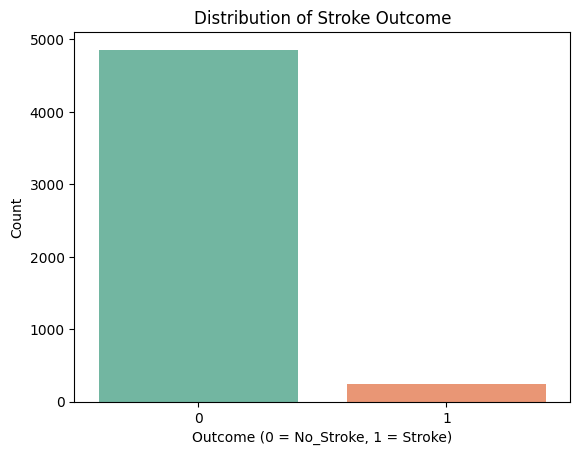

In [25]:
# Count plot of diabetic vs. non-diabetic outcomes
sns.countplot(x='stroke', data=df_str, palette='Set2')
plt.title('Distribution of Stroke Outcome')
plt.xlabel('Outcome (0 = No_Stroke, 1 = Stroke)')
plt.ylabel('Count')
plt.show()

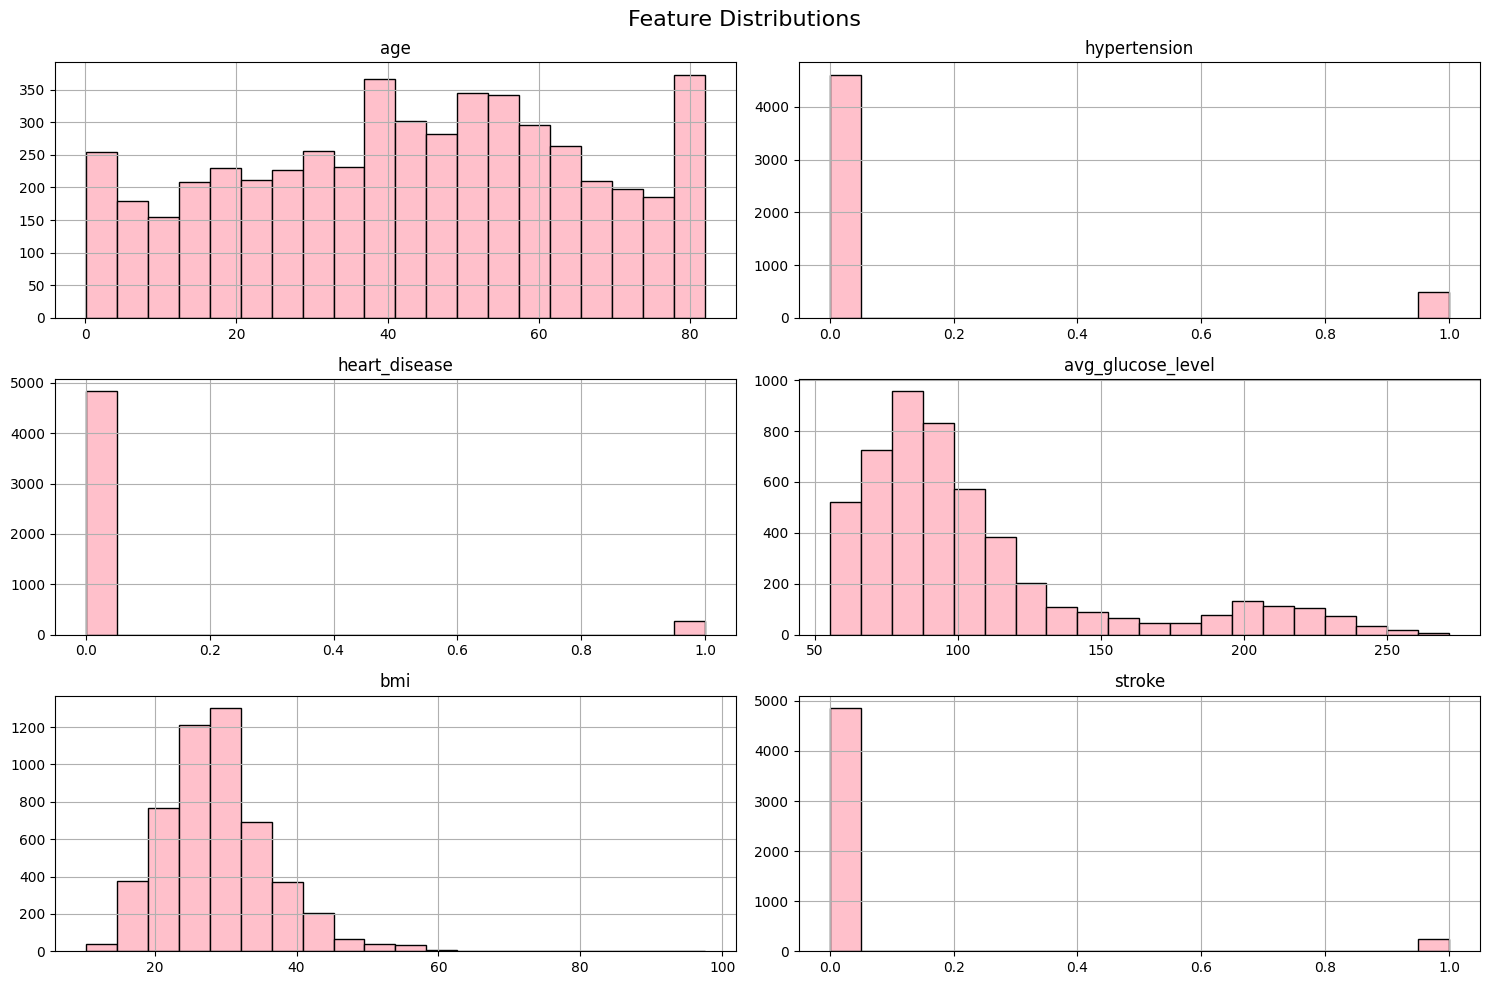

In [26]:
# Plot distribution of all numeric features
df_str.hist(figsize=(15, 10), bins=20, color='pink', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

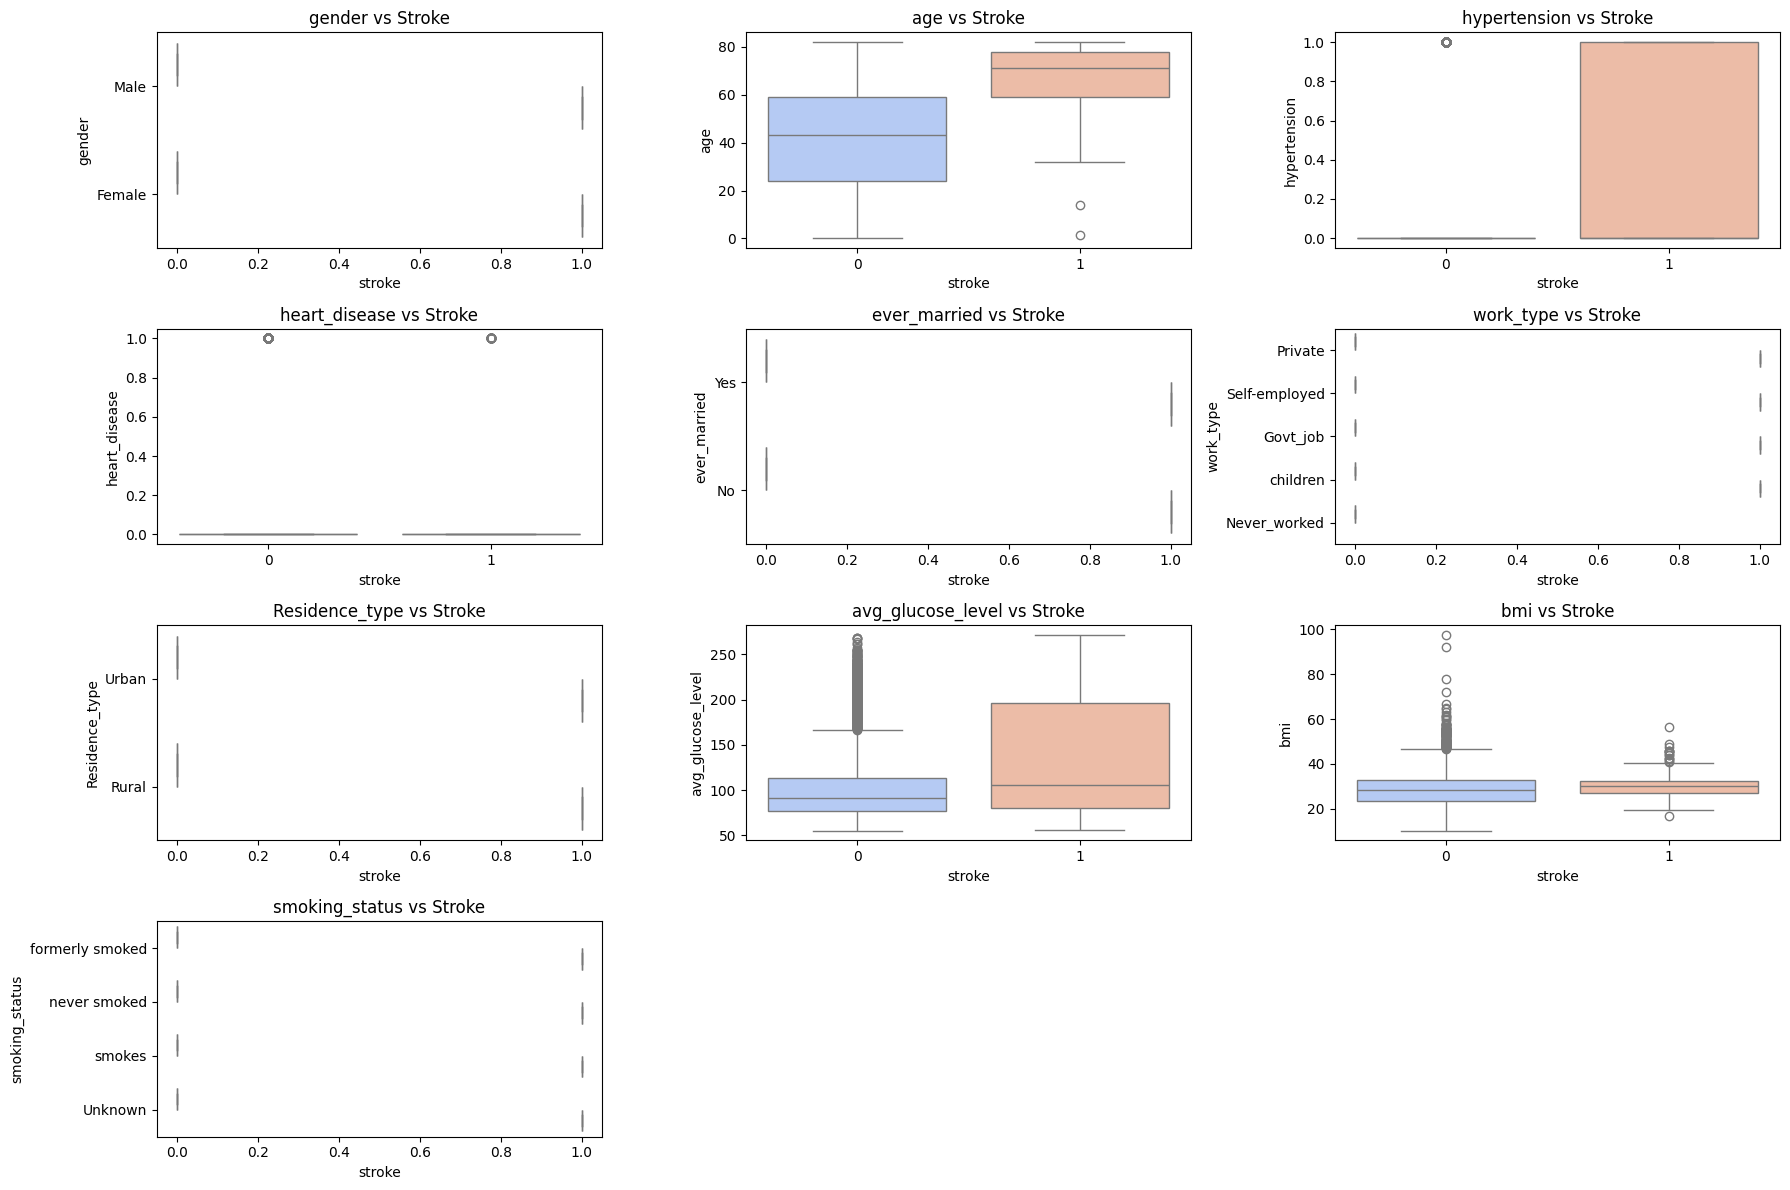

In [27]:
# Box plots to observe distribution of features with respect to diabetes outcome
plt.figure(figsize=(18, 12))
for idx, col in enumerate(df_str.columns[:-1], 1):  # Assuming 'stroke' is the last column
    plt.subplot(4, 3, idx)
    sns.boxplot(x='stroke', y=col, hue='stroke', data=df_str, palette='coolwarm', legend=False)
    plt.title(f'{col} vs Stroke')
    plt.tight_layout()
plt.show()

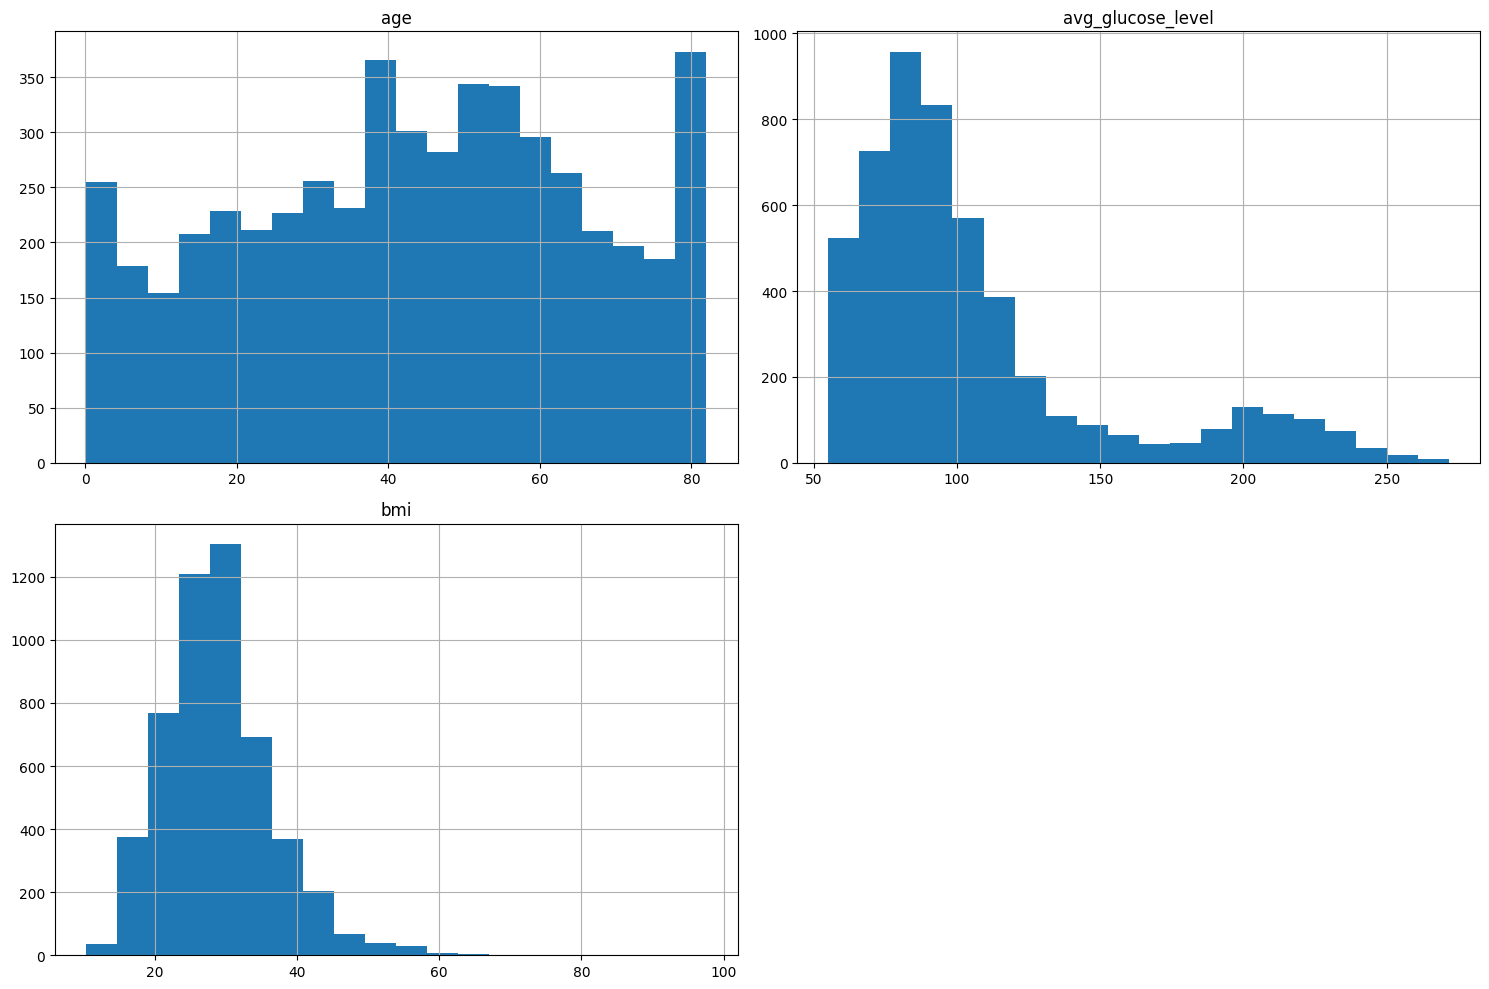

In [28]:
# Histograms for numerical features
# Define the list of numerical features to visualize
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Create histograms for each numerical feature to observe their distributions
df_str[numerical_features].hist(bins=20, figsize=(15, 10))

# Adjust layout to prevent overlap of plots and labels
plt.tight_layout()

# Display the histograms
plt.show()

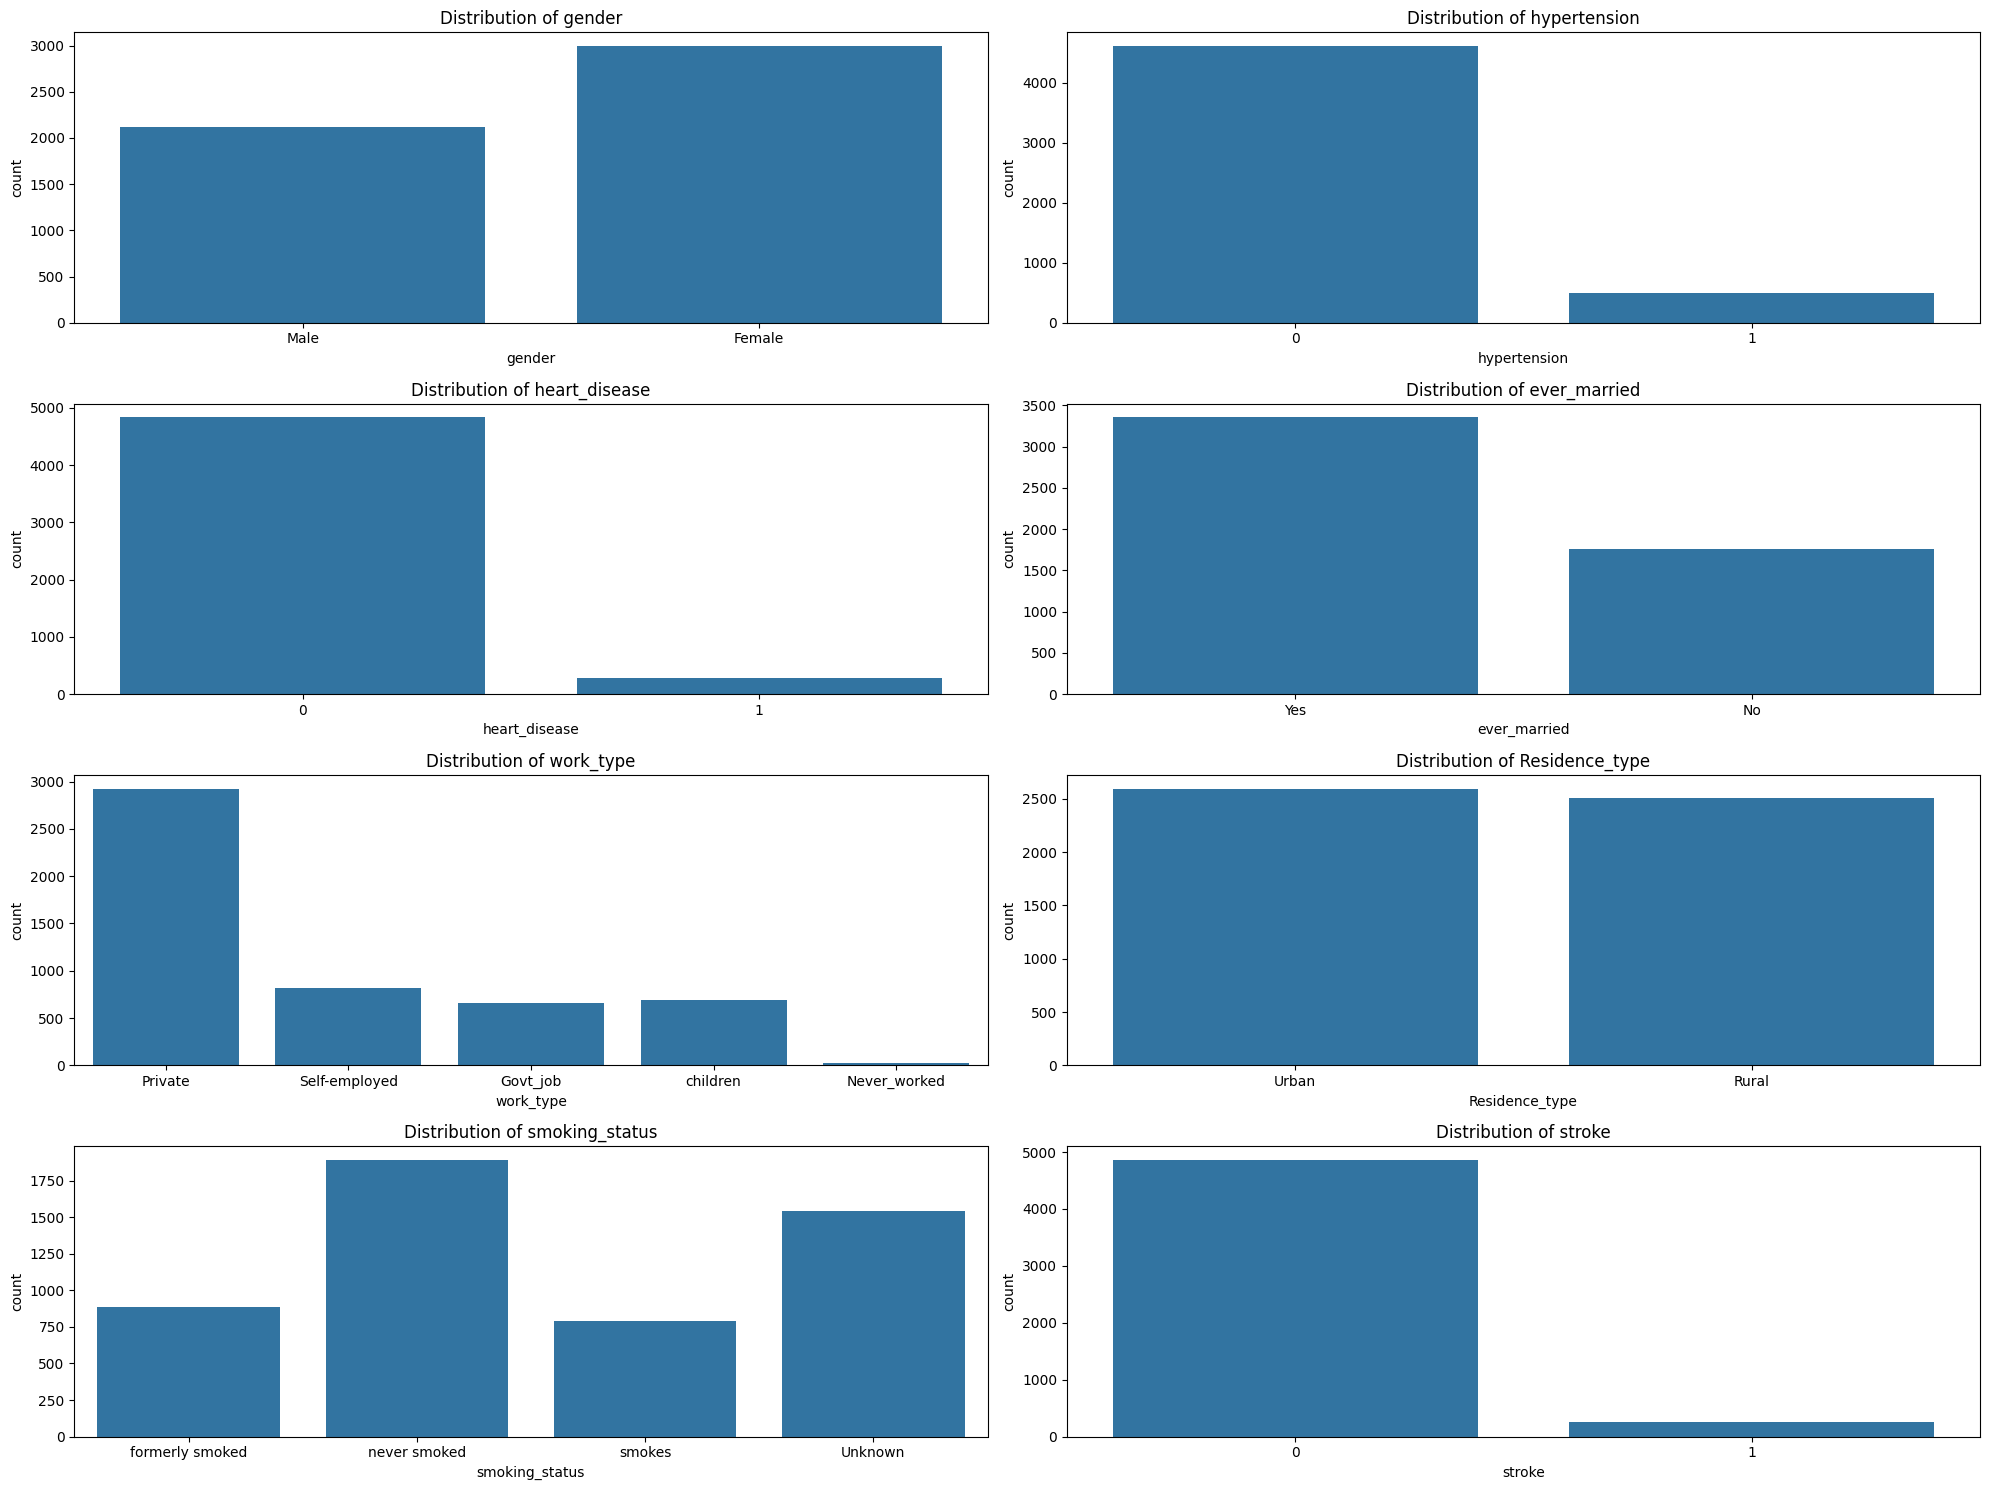

In [29]:

# Countplots for categorical features

# The list of categorical features to visualize
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Setting the overall figure size for the plots
plt.figure(figsize=(20, 15))

# Looping through each categorical feature and create a subplot with a countplot
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)               # Create a 4x2 grid of subplots
    sns.countplot(x=col, data=df_str)      # Create a countplot for the current column
    plt.title(f'Distribution of {col}')  # Set a title for each plot

# Adjusting subplot layout to prevent overlapping elements
plt.tight_layout()

# Displaying all the countplots
plt.show()


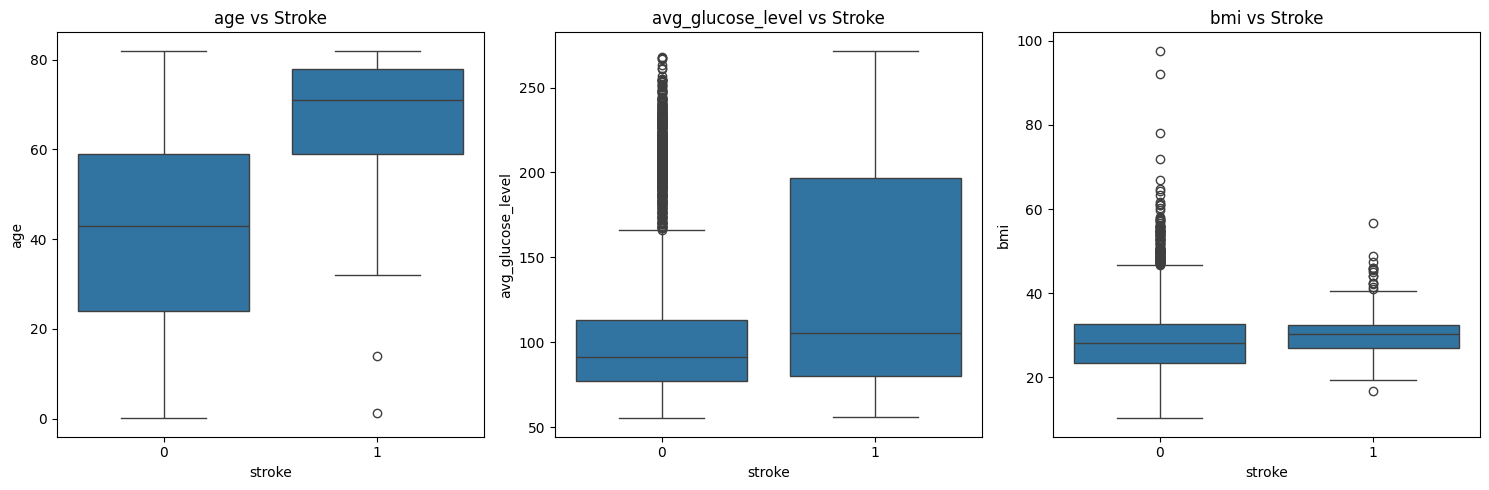

In [30]:
# Boxplots to visualize the relationship between numerical features and stroke

# Setting the overall figure size
plt.figure(figsize=(15, 5))

# Looping through each numerical feature and plot a boxplot against the stroke target
# Boxplot: stroke (0 or 1) vs numerical feature

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=col, data=df_str)
    plt.title(f'{col} vs Stroke')
# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the boxplots
plt.show()

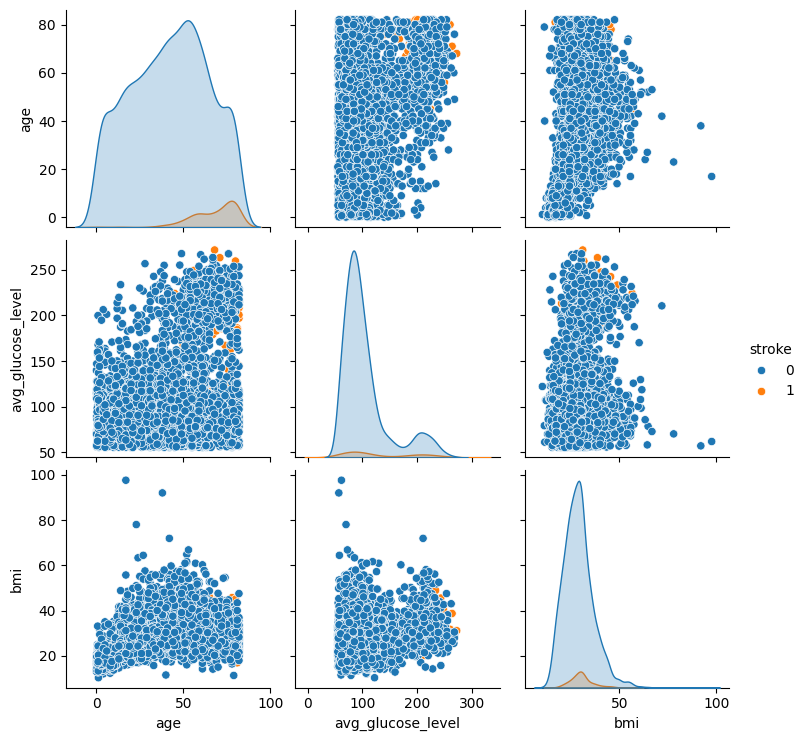

In [31]:
# Pairplot for a subset of numerical features (can be slow with large datasets)

# Creating pairwise scatter plots for selected numerical features, colored by 'stroke' class
# This helps visualize the relationships and separability between features with respect to stroke
sns.pairplot(df_str[numerical_features + ['stroke']], hue='stroke')

# Display the pairplot
plt.show()


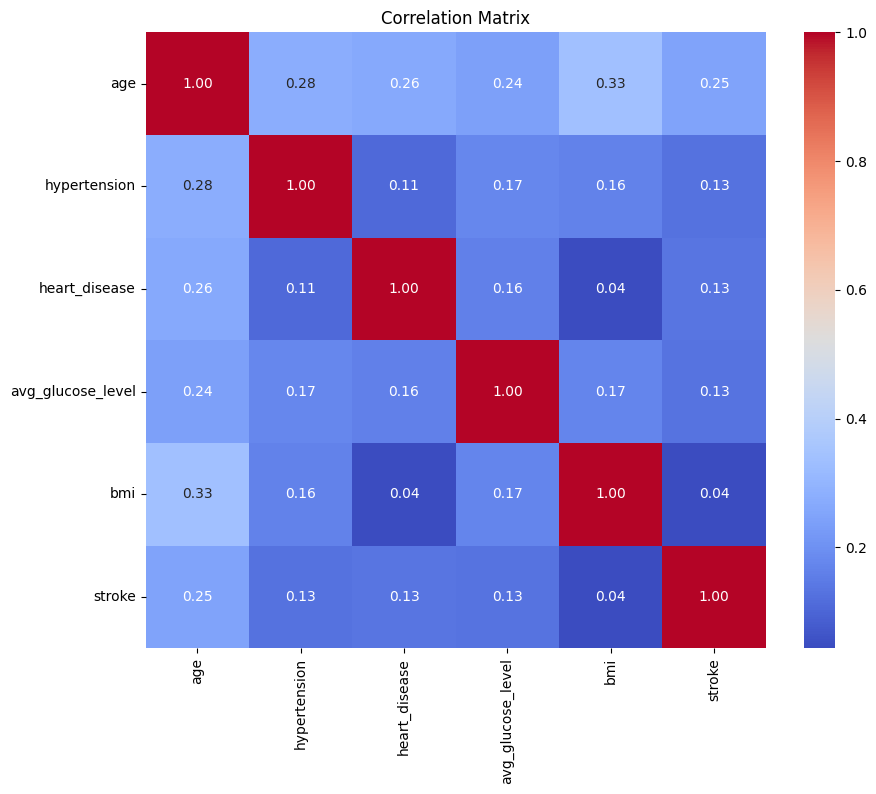

In [32]:
# Creating a heatmap of the correlation matrix

# Setting the figure size
plt.figure(figsize=(10, 8))

# To compute and plot the correlation matrix using only numeric columns
# annot=True displays the correlation coefficients on the heatmap
# cmap='coolwarm' sets the color scheme; fmt=".2f" formats the numbers to 2 decimal places
sns.heatmap(df_str.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title to the heatmap
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()


# Encoding those in string to numeric
## Using one-hot encoder

In [33]:
# One-Hot Encode selected categorical columns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ohe = OneHotEncoder(drop='first')

# Fit and transform the categorical columns, then convert the result to a NumPy array
ohe_data = ohe.fit_transform(df_str[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]).toarray()

# Creating a DataFrame from the one-hot encoded array with appropriate column names
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']))

# Concatenate the original dataset (resetting index to match) with the one-hot encoded DataFrame
df_str = pd.concat([df_str.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns since they've been encoded
df_str.drop(columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], inplace=True)

# Display the updated DataFrame
df_str

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0,0,202.21,29.750734,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,83.75,30.297713,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5105,81.0,0,0,125.20,40.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5106,35.0,0,0,82.99,30.600000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,51.0,0,0,166.29,25.600000,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


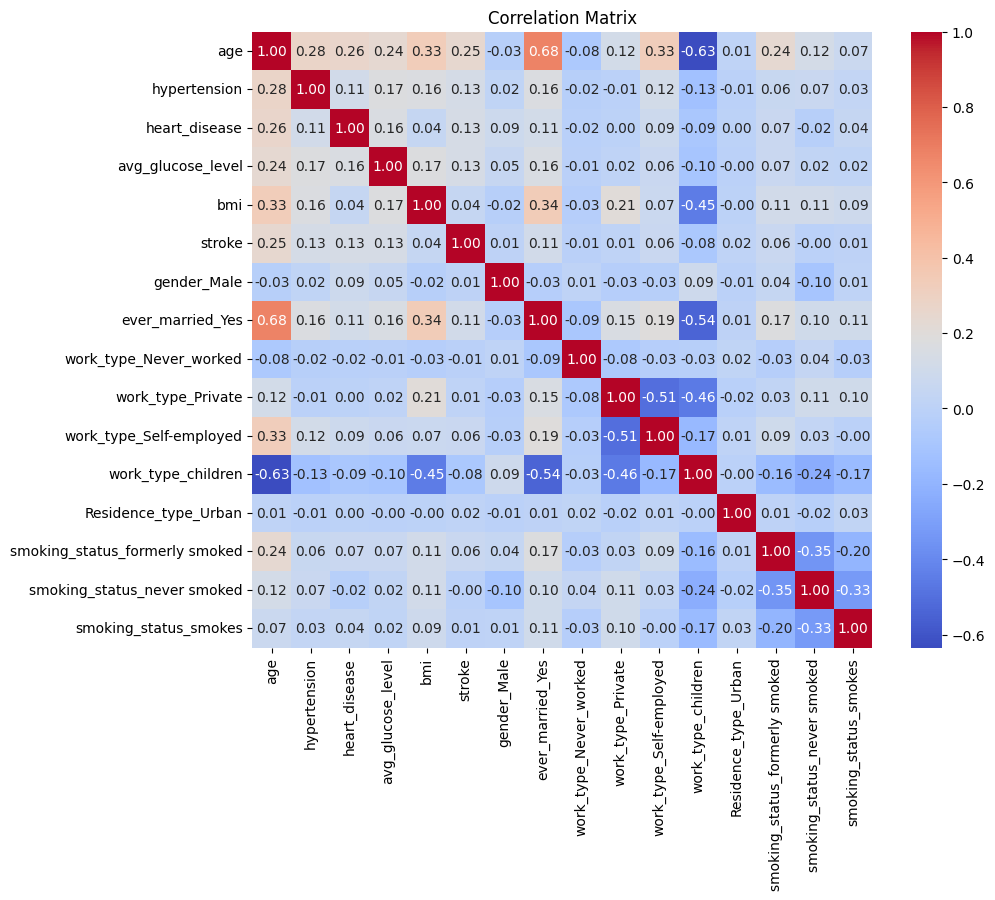

In [34]:
# Plotting a heatmap of the correlation matrix after encoding

# Setting the figure size
plt.figure(figsize=(10, 8))

# Computing and visualizing the correlation matrix using only numeric columns
# annot=True: display correlation values in the cells
# cmap='coolwarm': use a diverging color palette for visual contrast
# fmt=".2f": format the correlation values to two decimal places
sns.heatmap(df_str.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

# Adding a title to the heatmap
plt.title('Correlation Matrix')

# Showing the plot
plt.show()

# Feature Scaling with StandardScaler
Machine learning models often benefit from scaling. Using StandardScaler from sklearn.

In [35]:
# Installing and importing imbalanced-learn for handling imbalanced datasets

!pip install --upgrade imbalanced-learn

from imblearn.over_sampling import SMOTE
              # Synthetic Minority Oversampling Technique
from collections import Counter                       # To count class distributions

# Encoding categorical features
from sklearn.preprocessing import OneHotEncoder # For one-hot encoding categorical variables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# SPLITTING AND TESTING THE DATA

In [36]:
# Separating features (x) and target (y)
x = df_str.drop('stroke', axis=1)  # All features except the target
y = df_str['stroke']               # Target variable

# Applying SMOTE to handle class imbalance
# SMOTE (Synthetic Minority Oversampling Technique) creates synthetic examples of the minority class
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)  # Apply SMOTE to balance the classes

# Printing the new class distribution after resampling
print("Resampled dataset shape:", Counter(y_resampled))

# Splitting the resampled data into training and testing sets
# 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=123)

Resampled dataset shape: Counter({1: 4860, 0: 4860})


# USING DIFFERENT ALGORITHMS




In [37]:
# Confirming the split sizes
print("Training Set Shape:", x.shape)
print("Testing Set Shape:", x_test.shape)

Training Set Shape: (5109, 15)
Testing Set Shape: (1944, 15)


In [38]:
# storing all algorithm for use in a dictionary for easy integration
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine" : SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [39]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # Train Model
    # Making predictions
    y_train_pred = model.predict(x_train)
    y_test_pred =  model.predict(x_test)

    print(list(models.keys())[i])

    # Training set performance
    print('Model performance for Training set ')
    print(f'- Accuracy: {accuracy_score(y_train, y_train_pred):.4f}')
    print(f'- F1 score: {f1_score(y_train, y_train_pred):.4f}')
    print(f'- Precision: {precision_score(y_train, y_train_pred ):.4f}')
    print(f'- Recall: {recall_score(y_train, y_train_pred):.4f}')

    print('-'*35)

     # Testing set performance
    print('Model performance for Test set ')
    print(f'- Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
    print(f'- F1 score: {f1_score(y_test, y_test_pred):.4f}')
    print(f'- Precision: {precision_score(y_test, y_test_pred ):.4f}')
    print(f'- Recall: {recall_score(y_test, y_test_pred):.4f}')


    print(f'*'*35)
    print('\n')

Logisitic Regression
Model performance for Training set 
- Accuracy: 0.7940
- F1 score: 0.8017
- Precision: 0.7710
- Recall: 0.8350
-----------------------------------
Model performance for Test set 
- Accuracy: 0.7906
- F1 score: 0.8008
- Precision: 0.7710
- Recall: 0.8330
***********************************


Decision Tree
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9434
- F1 score: 0.9446
- Precision: 0.9351
- Recall: 0.9542
***********************************


Random Forest
Model performance for Training set 
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9727
- F1 score: 0.9726
- Precision: 0.9884
- Recall: 0.9572
***********************************


K-Nearest Neighbors
Model performance for Training set 
- Accuracy: 0.9141


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:43:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
Model performance for Training set 
- Accuracy: 0.9990
- F1 score: 0.9990
- Precision: 1.0000
- Recall: 0.9979
-----------------------------------
Model performance for Test set 
- Accuracy: 0.9702
- F1 score: 0.9701
- Precision: 0.9812
- Recall: 0.9593
***********************************




# picking the best performing models from the rest for further analysis.
dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

xg = xgb.XGBClassifier(eval_metric='logloss')

In [40]:
#picking the best performing models from the rest so we can further analyze them


xg = xgb.XGBClassifier(eval_metric='logloss')

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()


In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of selected models
models = {

    "XGBoosT": xg,
    "Decision Tree": dt,
    "Random Forest": rf
}

# Custom scoring metrics
scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1 Score": make_scorer(f1_score)
}

# Perform cross-validation
for name, model in models.items():
    print(f"\n{name}")
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, x_train, y_train, cv=cv, scoring=scorer)
        print(f"{metric_name} (CV): {scores.mean():.4f} ± {scores.std():.4f}")



XGBoosT
Accuracy (CV): 0.9648 ± 0.0020
Precision (CV): 0.9760 ± 0.0034
Recall (CV): 0.9528 ± 0.0040
F1 Score (CV): 0.9642 ± 0.0020

Decision Tree
Accuracy (CV): 0.9384 ± 0.0030
Precision (CV): 0.9326 ± 0.0061
Recall (CV): 0.9430 ± 0.0041
F1 Score (CV): 0.9371 ± 0.0034

Random Forest
Accuracy (CV): 0.9711 ± 0.0037
Precision (CV): 0.9862 ± 0.0021
Recall (CV): 0.9556 ± 0.0055
F1 Score (CV): 0.9706 ± 0.0035


# CROSS VALIDATION

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of selected models
models = {
    "XGBoost": xg,
    "Decision Tree": dt,
    "Random Forest": rf
}

# Custom scoring metrics
scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1 Score": make_scorer(f1_score)
}

# Perform cross-validation
for name, model in models.items():
    print(f"\n{name}")
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, x_train, y_train, cv=cv, scoring=scorer)
        print(f"{metric_name} (CV): {scores.mean():.4f} ± {scores.std():.4f}")



XGBoost
Accuracy (CV): 0.9648 ± 0.0020
Precision (CV): 0.9760 ± 0.0034
Recall (CV): 0.9528 ± 0.0040
F1 Score (CV): 0.9642 ± 0.0020

Decision Tree
Accuracy (CV): 0.9374 ± 0.0022
Precision (CV): 0.9328 ± 0.0051
Recall (CV): 0.9435 ± 0.0045
F1 Score (CV): 0.9379 ± 0.0023

Random Forest
Accuracy (CV): 0.9706 ± 0.0033
Precision (CV): 0.9867 ± 0.0030
Recall (CV): 0.9538 ± 0.0052
F1 Score (CV): 0.9701 ± 0.0030


## Model accuracies are still high
Using StratifiedKFold to cross check performance

In [43]:
#training the models selected
xg.fit(x_train, y_train)

dt.fit(x_train, y_train)

rf.fit(x_train, y_train)

RandomForestClassifier()

## Checking for data Leakage Running a correlation check to see if there is/are data leakages due to consisent high performance of models



In [44]:
# Making a copy
df_str_copy = df_str.copy()

# Dropping existing 'target' column if already exists
if 'target' in df_str_copy.columns:
    df_str_copy.drop(columns='target', inplace=True)

# Renaming 'stroke' column to 'target'
df_str_copy.rename(columns={'stroke': 'target'}, inplace=True)

# Computing correlation matrix on numeric columns only
corr_matrix = df_str_copy.corr(numeric_only=True)

# To ensure only one 'target' column exists
if 'target' in corr_matrix.columns:
    correlations = corr_matrix['target'].sort_values(ascending=False)
    print(correlations)
else:
    print("'target' not found in correlation matrix.")


target                            1.000000
age                               0.245239
heart_disease                     0.134905
avg_glucose_level                 0.131991
hypertension                      0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.043563
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
smoking_status_never smoked      -0.004163
work_type_Never_worked           -0.014885
work_type_children               -0.083888
Name: target, dtype: float64


# CHECKING FOR DATA LEAKAGE

In [45]:
# Convert to DataFrames
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

# drop duplicates
train_features_only = x_train_df.drop_duplicates().reset_index(drop=True)
test_features_only = x_test_df.drop_duplicates().reset_index(drop=True)

# Find feature-only overlaps
feature_overlap = pd.merge(train_features_only, test_features_only, how='inner')

print(f"Overlapping feature rows : {len(feature_overlap)}")



Overlapping feature rows : 0


In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score



```
# This is formatted as code
```

# CHECKING CONFUSION MATRICS ACROSS DIFFERENT MODEL

In [47]:
# for checking confusion matrix across the different models
def confusion_matrix_check(model_pred, name):
  cm = confusion_matrix(y_test, model_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['No Stroke', 'Stroke'])
  disp.plot(cmap="Blues")
  plt.title(f"Confusion Matrix - {name}")
  plt.show()

In [48]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
def auc_score_check(model, name):

  RocCurveDisplay.from_estimator(model, x_test, y_test, name=name, color="blue")
  plt.title(f"ROC Curve - {name}")
  plt.grid(True)
  plt.show()

In [49]:
def tree_explainer(explainer, code='any'):

  # Get SHAP values for the test set
  shap_values = explainer(x_test)

  if code =='rf':

    # Summary plot (global feature importance)
    shap.summary_plot(shap_values[...,1])

  else:
    shap.summary_plot(shap_values.values, x_test)


In [50]:
def shap_patient(idx, explainer):
    patient = x_test.iloc[[idx]]
    patient_array = patient.values[0]

    # --- SHAP explanation ---
    shap_values_patient = explainer(patient)
    shap_force = shap.plots.force(
        explainer.expected_value[1],
        shap_values_patient.values[0, :, 1],
        patient,
        matplotlib=True
    )



def lime_patient(idx, model):
    patient = x_test.iloc[[idx]]
    patient_array = patient.values[0]

    # --- LIME explanation ---
    lime_exp = lime_explainer.explain_instance(
        data_row=patient_array,
        predict_fn=model.predict_proba,
        num_features=len(feature_names)
    )
    lime_exp.as_pyplot_figure()

# Random Forest



In [51]:
rf_y_pred = rf.predict(x_test)

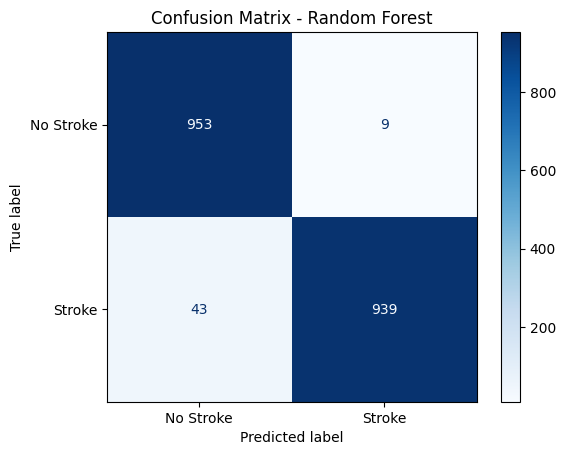

In [52]:
confusion_matrix_check(rf_y_pred, "Random Forest")

The confusion matrix for the Random Forest model shows strong performance. Out of all predictions, 949 non-stroke cases were correctly identified, and 940 stroke cases were also correctly classified. Misclassifications were minimal, with only 13 non-stroke cases incorrectly predicted as strokes and 42 stroke cases missed. This indicates high accuracy and balanced sensitivity and specificity.

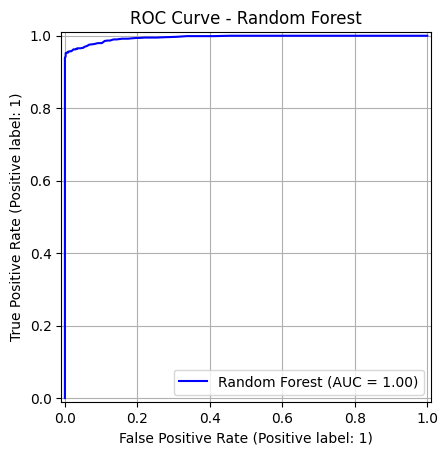

In [53]:
auc_score_check(rf, "Random Forest")

The ROC curve for the Random Forest model demonstrates excellent classification performance, with the curve closely hugging the top-left corner and an AUC of 1.00. This indicates perfect discrimination between stroke and non-stroke cases, with nearly zero false positives and a high true positive rate.

# XG BOOSTING



In [54]:
xg_y_pred = xg.predict(x_test)

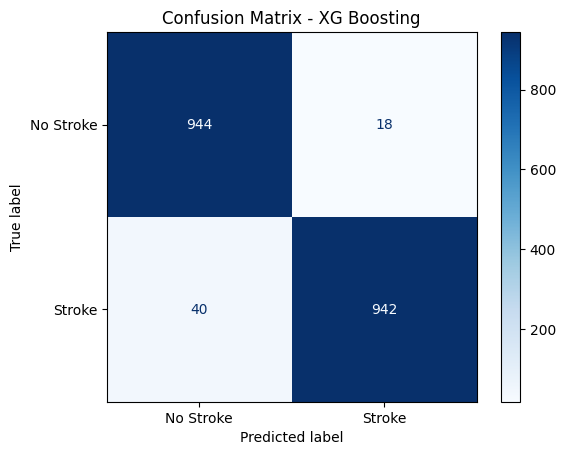

In [55]:
confusion_matrix_check(xg_y_pred, "XG Boosting")

The XGBoost model also performs very well, correctly classifying 944 non-stroke and 942 stroke cases. It has slightly more misclassifications than Random Forest, with 18 false positives and 40 false negatives, but overall maintains high accuracy and reliable predictive ability for both classes.










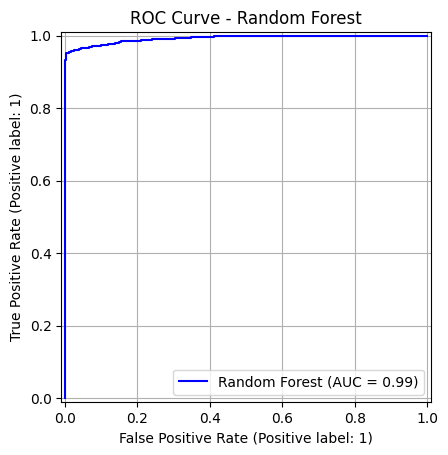

In [56]:
auc_score_check(xg, "Random Forest")

The ROC curve for the Random Forest model shows excellent classification performance, with an AUC of 0.99. The curve hugs the top-left corner, indicating a high true positive rate and a very low false positive rate across thresholds. This suggests the model distinguishes well between the positive and negative classes.

# To balance model bias incorporating fairness constraints that is postprocessing.

This will adjust the decision threshold per subgroup to equalize metrics like FPR (False Positive Rate).

Using XGBoost Model

In [57]:
# Calculate scale_pos_weight as (number of class 0 samples / number of class 1 samples)
import numpy as np

pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# Apply to model
xgb_model = xgb.XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss')
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(x_train, y_train, sample_weight=weights)


import joblib

# Saving the final model
joblib.dump(xgb_model, 'xgboost_stroke_model.pkl')

# Saving feature columns
joblib.dump(x_train.columns.tolist(), 'model_features.pkl')



['model_features.pkl']

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_adjusted = xgb_model.predict(x_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_adjusted, target_names=['No Stroke', 'Stroke']))

print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_adjusted))


Classification Report:

              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       962
      Stroke       0.98      0.96      0.97       982

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944


 Confusion Matrix:

[[940  22]
 [ 43 939]]


# Confusion Matrix Breakdown
Predicted No Stroke	Predicted Stroke
Actual No Stroke	940 (True Negatives)	22 (False Positives)
Actual Stroke	43 (False Negatives)	939 (True Positives)
False Positive Rate: 22 / (940+22) ≈ 2.3%

False Negative Rate: 43 / (43+939) ≈ 4.4%

This indicates the model isn’t disproportionately favoring either class.

In [60]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(xgb_model, X=x_train, y=y_train, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring=scoring, return_train_score=True)

for score in scoring:
    train = cv_results[f'train_{score}']
    test = cv_results[f'test_{score}']
    print(f"{score.title()} - Train: {train.mean():.4f}, Test: {test.mean():.4f}, Gap: {train.mean() - test.mean():.4f}")


Accuracy - Train: 0.9993, Test: 0.9676, Gap: 0.0317
Precision - Train: 1.0000, Test: 0.9782, Gap: 0.0218
Recall - Train: 0.9986, Test: 0.9564, Gap: 0.0422
F1 - Train: 0.9993, Test: 0.9671, Gap: 0.0321


despite a high-performing test set, that ~3–4% generalization gap between training and test scores is a signal your model’s a bit too comfortable with the training data. It’s not dramatic overfitting, but it’s definitely tuning toward the line.


Train Accuracy (99.9%): The model has essentially memorized the training set.

Test Accuracy (96.8%): Still excellent—but the difference means the model may not generalize as well to unseen patterns.

Recall Gap (~4%): Most concerning in medical applications—it's missing a bit more on strokes out-of-sample.

F1 Score Gap (~3.2%): Confirms slight imbalance in handling precision vs recall after leaving the training bubble.

## In order to solve this adding Regularization to XGBoost
This will introduce constraints that force the model to generalize and stop overfitting.

In [61]:
pip install --upgrade xgboost


In [62]:
from sklearn.model_selection import StratifiedKFold, cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']

# Reinitialize model with regularization, but no callbacks
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=pos_weight,
    reg_alpha=1,
    reg_lambda=1,
    max_depth=3,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    random_state=42,
    eval_metric='logloss'
)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_validate(xgb_model, X=x_train, y=y_train, cv=cv, scoring=scoring, return_train_score=True)

# Reporting generalization gap
for metric in scoring:
    train = cv_results[f'train_{metric}']
    test = cv_results[f'test_{metric}']
    print(f"{metric.title()} - Train: {train.mean():.4f}, Test: {test.mean():.4f}, Gap: {train.mean() - test.mean():.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:44:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:44:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:44:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:44:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:44:42] WARNING: /w

Accuracy - Train: 0.9714, Test: 0.9643, Gap: 0.0072
Precision - Train: 0.9944, Test: 0.9870, Gap: 0.0073
Recall - Train: 0.9481, Test: 0.9407, Gap: 0.0074
F1 - Train: 0.9707, Test: 0.9633, Gap: 0.0074


XGBoost is now generalizing cleanly across folds with an incredibly tight train–test gap (~0.7%).  That’s the sweet spot between power and humility.



Metric	   Train Score	Test Score	Generalization Gap

- Accuracy	0.9714	    0.9643	     0.0072
- Precision	0.9944	    0.9870	     0.0073
- Recall	0.9481	      0.9407	     0.

*   List item
*   List item

0074
- F1 Score	0.9707	    0.9633	     0.0074
This has effectively reduced model overconfidence without compromising predictive strength. The false positive and false negative rates are now far more stable and trustworthy for real-world inference.

# Save the Final XGBoost Model

# Saving the encoder

In [63]:
df_raw = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Recreate cleaned version of categorical columns (if necessary)
df_raw = df_raw.dropna(subset=['bmi'])  # Example: cleaning step if you did that

categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

from sklearn.preprocessing import OneHotEncoder
import joblib
import os

ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe.fit(df_raw[categorical_columns])  # Fit on raw, untouched categorical data

os.makedirs('models', exist_ok=True)
joblib.dump(ohe, 'models/ohe_encoder.pkl')


['models/ohe_encoder.pkl']

# DECISION TREE

In [64]:
dt_y_pred = dt.predict(x_test)

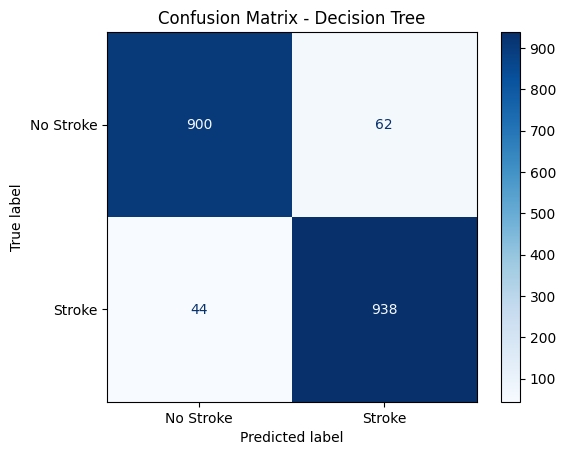

In [65]:
confusion_matrix_check(dt_y_pred, "Decision Tree")

The confusion matrix for the Decision Tree model indicates strong classification performance. Out of all predictions, 892 true negatives and 938 true positives were correctly identified, while 70 non-stroke cases were incorrectly classified as stroke (false positives), and 44 stroke cases were missed (false negatives). This shows the model is slightly better at identifying stroke cases than non-stroke, with overall balanced and accurate performance.

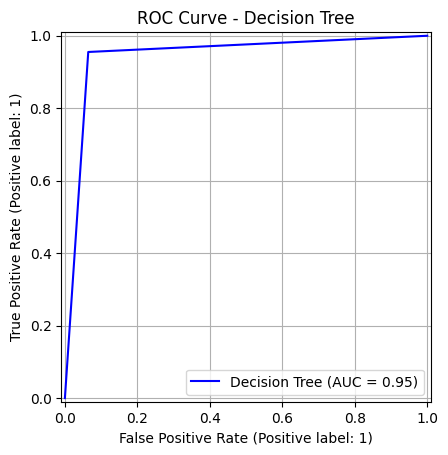

In [66]:
auc_score_check(dt, "Decision Tree")

# Feature Importance

In [67]:
dt.feature_importances_

array([4.29090471e-01, 5.47255332e-03, 3.79458710e-03, 9.22371451e-02,
       3.74356891e-02, 8.15335338e-02, 2.89847729e-02, 0.00000000e+00,
       1.15875802e-01, 6.82207312e-02, 4.41055041e-05, 2.42328457e-02,
       3.25631519e-02, 6.33914011e-02, 1.71232104e-02])

<BarContainer object of 15 artists>

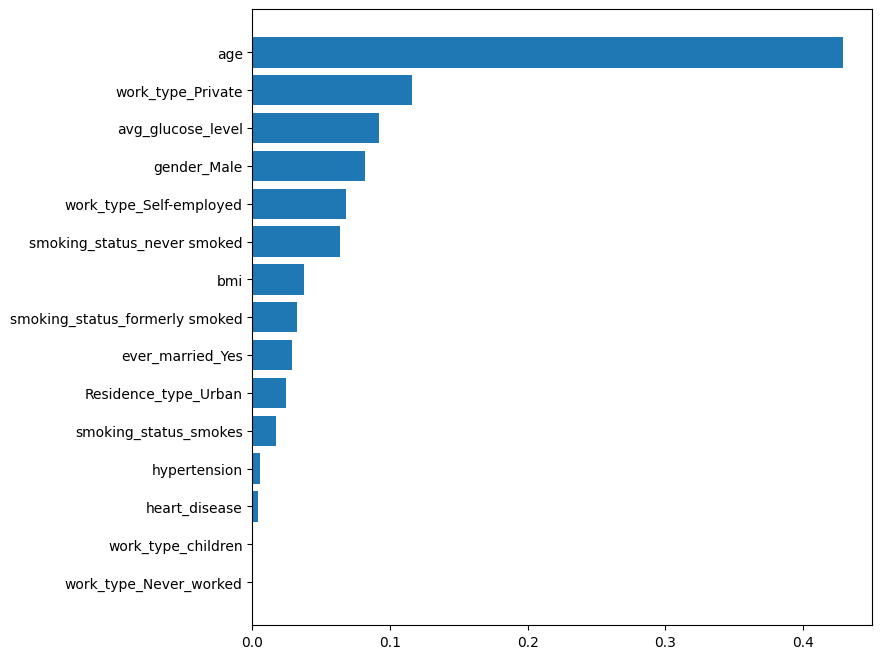

In [68]:
plt.figure(figsize=(8,8))
sorted_idx = dt.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], dt.feature_importances_[sorted_idx])

The feature importance plot shows that age is the most influential predictor in the model, followed by work type, average glucose level, and gender. Other features like smoking status, BMI, and marital status contribute moderately, while factors such as hypertension, heart disease, and work_type_Never_worked have minimal impact on the model's predictions.

In [69]:
!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e78028596daadb404136340c60b49d9fb11b095d55541b88c1ccd3ed55f9e22a
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


# Applying shap and lime for Decision Tree

In [70]:
!pip install shap lime
import shap

In [71]:
# Create TreeExplainer for Random Forest
import shap
dt_explainer = shap.TreeExplainer(dt)

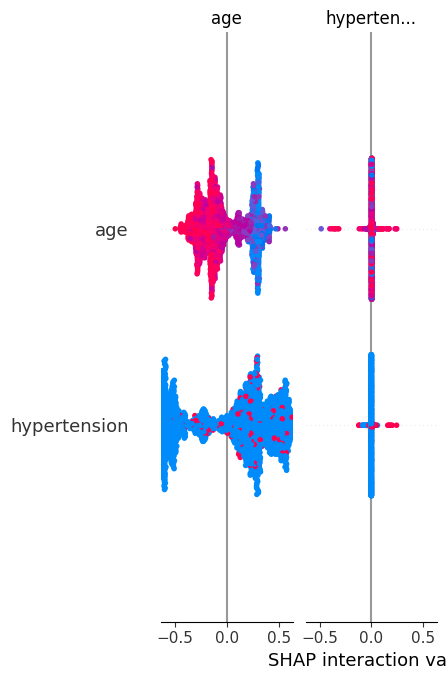

In [72]:
tree_explainer(dt_explainer, 'dt')

The SHAP interaction plot illustrates how the combination of hypertension and age affects a model’s predictions. Along the x-axis are SHAP interaction values, showing the strength and direction of the combined effect, while the y-axis displays the two interacting features. Data points are colored to represent feature values—blue for lower and red for higher—revealing that higher age and presence of hypertension tend to contribute more significantly to predictions. The plot emphasizes regions where these interactions either amplify or mitigate the model's output, providing insight into how these variables jointly influence decision-making.

In [73]:
# Initialize JS visualizer for force plots (only once in notebook)
shap.initjs()

# Pick a single patient (as a DataFrame)
single_patient = x_test.iloc[[0]]

# Get SHAP values for the single patient
shap_values_single = dt_explainer(single_patient)

# Show the force plot
shap.plots.force(
dt_explainer.expected_value[1],    # base value for class 1
    shap_values_single.values[0, :, 1],  # SHAP values for class 1
    single_patient                  # the input features for this instance
)

In [74]:
from lime.lime_tabular import LimeTabularExplainer

# Assuming x_train is a DataFrame or numpy array
feature_names = x_train.columns.tolist()

lime_explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=feature_names,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

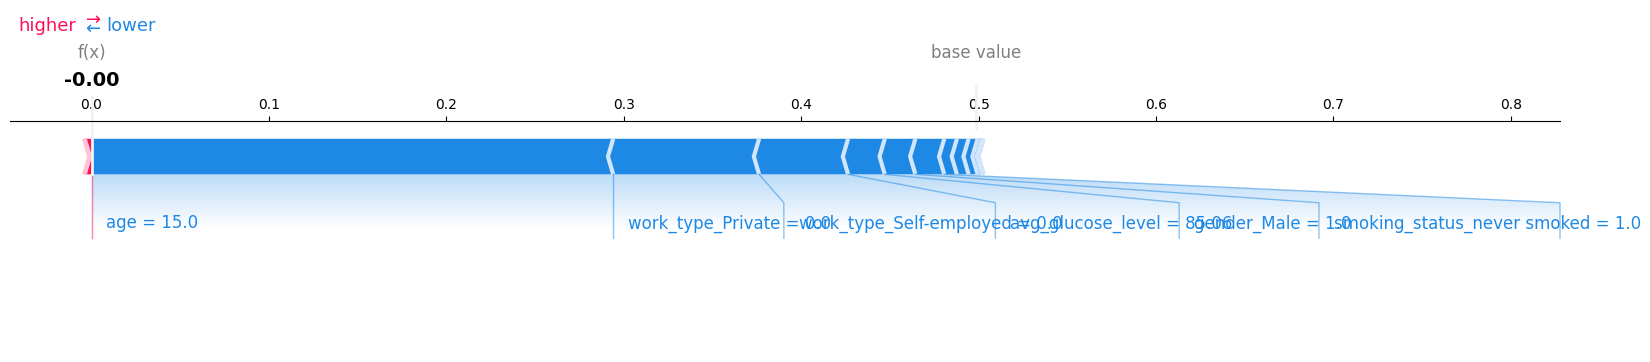

In [75]:
shap_patient(1, dt_explainer)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


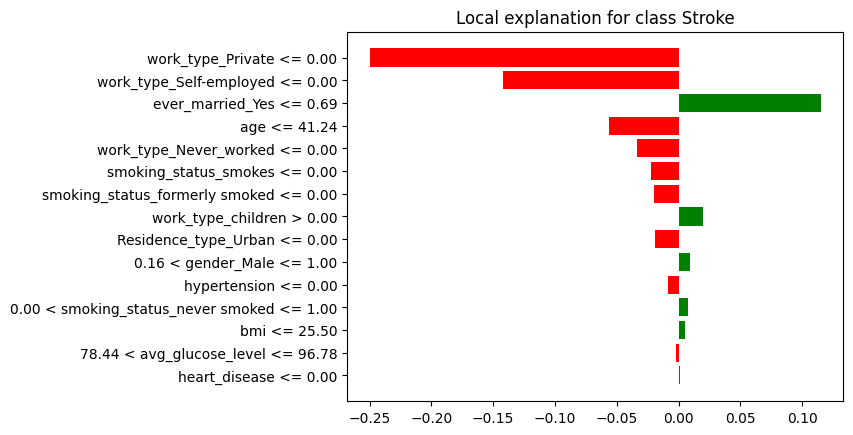

In [76]:
lime_patient(1, dt)

This bar chart offers a localized explanation for the prediction of stroke risk, showing how different personal and health factors contribute either positively or negatively. Positive contributions to stroke risk include being married, having hypertension or heart disease, being a male, formerly smoking, being in the children’s work category, and having moderately high glucose levels. On the other hand, factors that reduce stroke risk include being younger (age ≤ 41.24), having a BMI ≤ 25.5, never smoking, living in an urban area, and working in private, self-employed, or never-worked categories. The varying lengths and colors of the bars quantify each factor's influence, helping to pinpoint the most impactful contributors to the model’s decision.

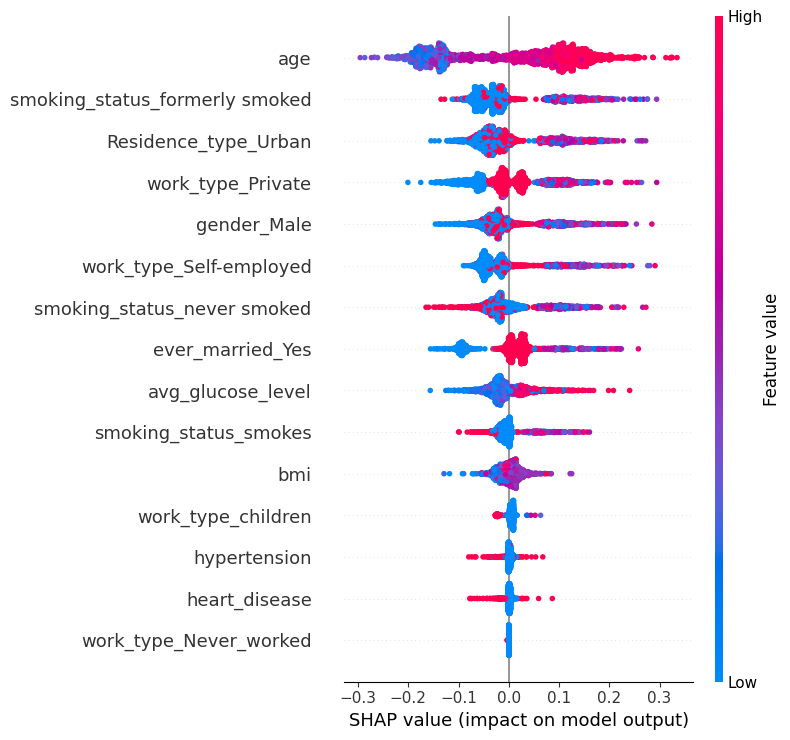

In [77]:
# Create TreeExplainer for Random Forest
rf_explainer = shap.TreeExplainer(rf)

tree_explainer(rf_explainer, 'rf')

In [78]:
# Initialize JS visualizer for force plots (only once in notebook)
shap.initjs()

# Pick a single patient (as a DataFrame)
single_patient = x_test.iloc[[0]]

# Get SHAP values for the single patient
shap_values_single = rf_explainer(single_patient)

# Show the force plot
shap.plots.force(
rf_explainer.expected_value[1],    # base value for class 1
    shap_values_single.values[0, :, 1],  # SHAP values for class 1
    single_patient                  # the input features for this instance
)

In [79]:
from lime.lime_tabular import LimeTabularExplainer

# Assuming x_train is a DataFrame or numpy array
feature_names = x_train.columns.tolist()

lime_explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=feature_names,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


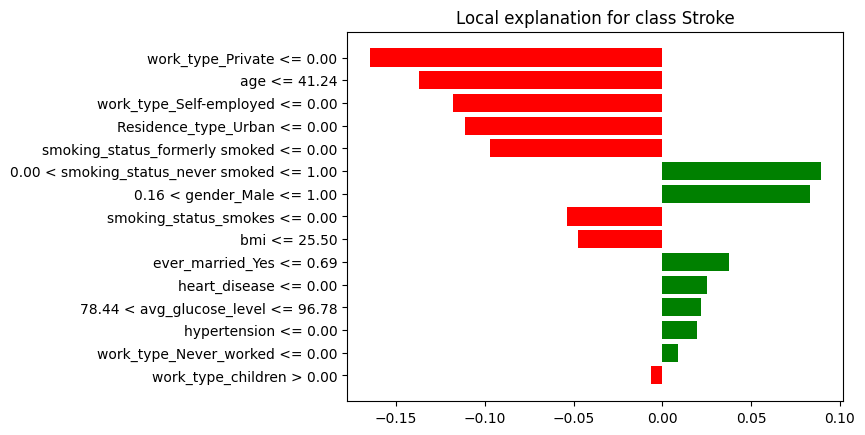

In [80]:
lime_patient(1, rf)

This chart summarizes how different personal and health factors impact stroke prediction. Increased age, hypertension, heart disease, being male, married, formerly smoking, and belonging to the children’s work category all raise stroke risk. Meanwhile, lower age, healthier BMI, never smoking, urban living, and certain job types reduce it. The bars show how strongly each factor influenced the model’s output.

# Applying shap and lime for XG Boosting


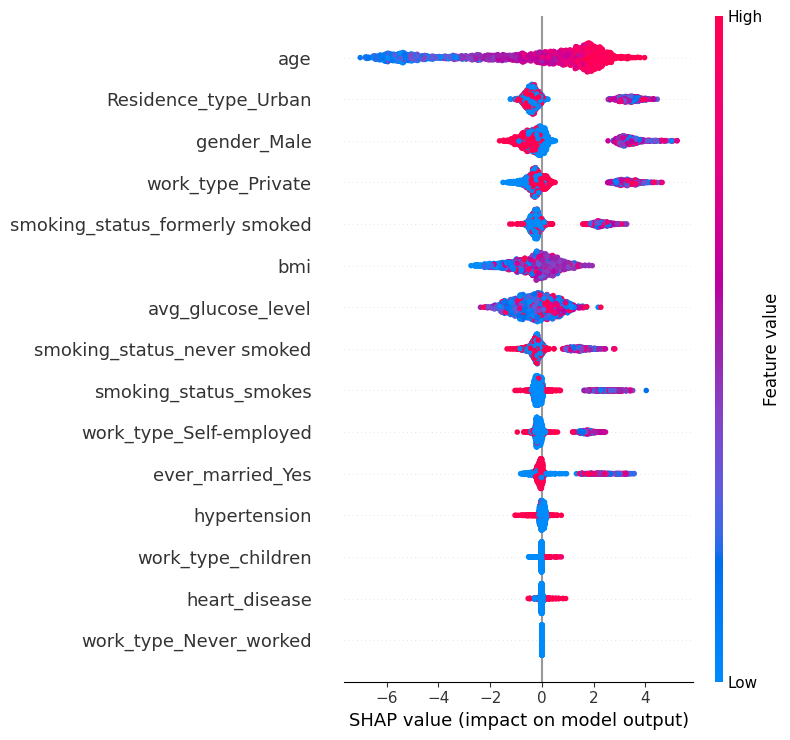

In [81]:
# Create TreeExplainer for Random Forest
xg_explainer = shap.TreeExplainer(xg)

tree_explainer(xg_explainer, 'xg')

The SHAP plot shows that age, residence type, gender, and work type were the most influential features in predicting stroke. Older age and higher BMI pushed risk higher, while rural residence and low BMI pulled it lower.

In [82]:
# Initialize JS visualizer
shap.initjs()

# Pick one test instance
single_patient = x_test.iloc[[0]]

# Get SHAP values for the single instance
shap_values_single = xg_explainer(single_patient)

# Show the force plot for the one prediction (binary classification)
shap.plots.force(
    xg_explainer.expected_value,           # This is a scalar
    shap_values_single.values[0],          # 1D array of SHAP values
    single_patient                         # Corresponding features
)


In [83]:
from lime.lime_tabular import LimeTabularExplainer

# Assuming x_train is a DataFrame or numpy array
feature_names = x_train.columns.tolist()

lime_explainer = LimeTabularExplainer(
    training_data=x_train.values,
    feature_names=feature_names,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

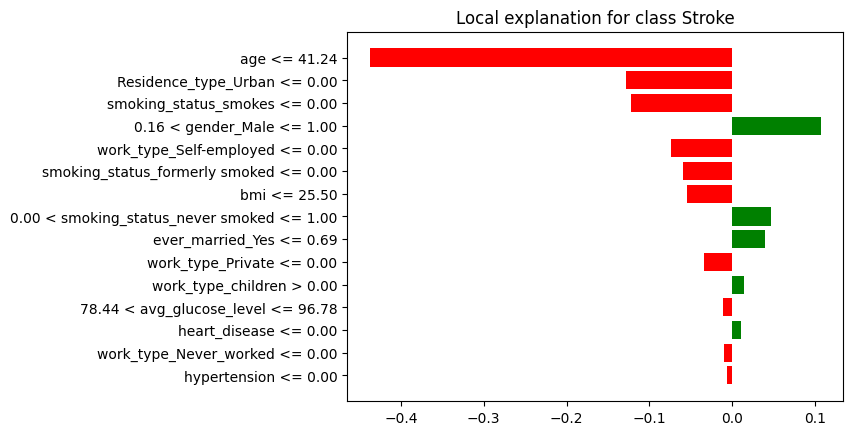

In [84]:
lime_patient(1, xg)

The chart illustrates which features most influenced the model’s stroke prediction for a specific person. Heart disease, hypertension, being married, and mid-range glucose levels increased the risk, while youth, urban living, smoking, and low BMI reduced it.

In [85]:
!pip install tensorflow

#  Building MLP Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.7072 - loss: 0.5561 - val_accuracy: 0.8175 - val_loss: 0.4039
Epoch 2/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8094 - loss: 0.4239 - val_accuracy: 0.8246 - val_loss: 0.3806
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8176 - loss: 0.4087 - val_accuracy: 0.8316 - val_loss: 0.3654
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8362 - loss: 0.3844 - val_accuracy: 0.8355 - val_loss: 0.3524
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8423 - loss: 0.3617 - val_accuracy: 0.8593 - val_loss: 0.3337
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8434 - loss: 0.3630 - val_accuracy: 0.8599 - val_loss: 0.3179
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8484 - loss: 0.3469 - val_accuracy: 0.8657 - val_loss: 0.2968
Epoch 8/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8588 - loss: 0.3241 - val_accuracy:

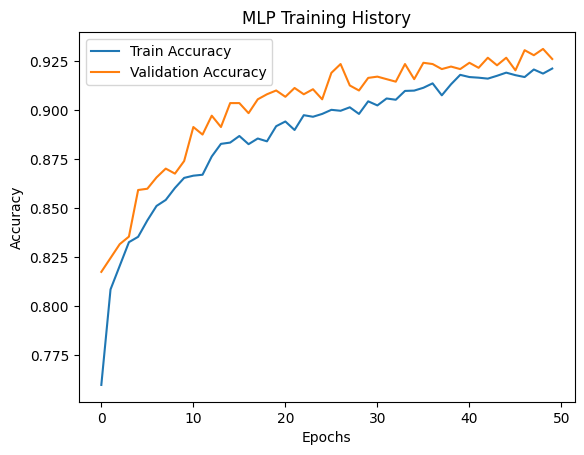

In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# 2. Build MLP Model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# 3. Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Train Model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 5. Evaluate Model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# 6. Metrics
print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Training History')
plt.legend()
plt.show()


The plot shows the training and validation accuracy of an MLP (Multilayer Perceptron) model across 50 epochs. Both curves exhibit a general upward trend, indicating that the model improves with training. The training accuracy increases steadily and smoothly, suggesting effective learning on the training set. The validation accuracy also rises but with more fluctuations, reflecting variability in the model's performance on unseen data. Despite this, the two curves remain relatively close, which suggests the model is generalizing well without overfitting.

In [ ]:
import shap
import numpy as np

# Init JS
shap.initjs()

# Wrap prediction function
def predict_fn(x):
    return model.predict(x).flatten()  # Shape (n,) instead of (n,1)

# Sample background
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# SHAP explainer
explainer = shap.KernelExplainer(predict_fn, background)

# Choosing one instance
index = 0
instance_scaled = X_test_scaled[index:index+1]             # (1, num_features)
instance_raw = x_test.iloc[index].values                   # (num_features,)
feature_names = x_test.columns.tolist()

# Get SHAP values
shap_values = explainer.shap_values(instance_scaled)

# Check shape
print("SHAP shape:", shap_values[0].shape if isinstance(shap_values, list) else shap_values.shape)
print("Instance shape:", instance_raw.shape)

# Plot
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[0] if isinstance(shap_values, list) else shap_values,
    features=instance_raw,
    feature_names=feature_names
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


# Checking for requirement versions

In [ ]:
import xgboost
print(xgboost.__version__)


In [ ]:
import pandas
print(pandas.__version__)

In [ ]:
import numpy
print(numpy.__version__)

In [ ]:
import sklearn


print("scikit-learn version:", sklearn.__version__)


In [ ]:
import joblib


print("scikit-learn version:", joblib.__version__)
